# Project Description

- The aim of the project is to identify the patterns determining the success of the game, which will allow to choose potentially popular products and plan advertising campaigns.


- Project plan: 
    1. Dataset upload, preprocessing of data
    2. Exploratory data analysis
    3. Compilation of user portraits of each region
    4. Testing hypotheses related to game ratings
    5. Conclusions and recommendations

# Dataset upload & pre-processing of the data

In [71]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# uploading the dataset

df = pd.read_csv('project_games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# checking for missing values

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

There missing values in the columns with the year of release, critic and user scores, and rating.

In [4]:
# checking for duplicates

df.duplicated().sum()

0

In [5]:
# checking for implicit duplicates

df.duplicated(subset=['Name', 'Platform', 'Year_of_Release']).sum()

2

In [6]:
# checking for implicit duplicates

df[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [7]:
# filtering out the duplicated rows

df.drop([14244, 16230], inplace=True)

There are no fully duplicated rows. There are 2 implicit duplicates, it was decided to filter these rows from the dataset.

In [8]:
# dataset description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16444.0,2006.485101,5.876309,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16713.0,0.263409,0.813647,0.0,0.0,0.08,0.24,41.36
EU_sales,16713.0,0.145076,0.503366,0.0,0.0,0.02,0.11,28.96
JP_sales,16713.0,0.077625,0.308871,0.0,0.0,0.00,0.04,10.22
Other_sales,16713.0,0.047348,0.186741,0.0,0.0,0.01,0.03,10.57
Critic_Score,8136.0,68.965954,13.938153,13.0,60.0,71.00,79.00,98.00


##  summary

At this step, the dataset was loaded and missing values were detected. There are no explicit duplicates in the dataset, and 2 implicit duplicates were removed. According to the description of the dataset we see that it contains data from 1980 to 2016, sales in three major regions (USA, Europe, Japan) + sales in other regions. The largest market is the US, followed by Europe and Japan.

# Data preprocessing

In [9]:
# setting the column names to lower case  

df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# checking dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Columns where the data type should be changed:**

**year_of_release** - it will be enough to change it to int type to use in charts, so that years will be displayed without a dot.

**user_score** - needs to be changed to float.

In [11]:
# checking what % of rows contains missing years

df['year_of_release'].isna().sum(), df['year_of_release'].isna().sum() / len(df)

(269, 0.016095255190570215)

There are 269 missing values, which is less than 2% of the data, so they can be filtered out of the dataset. The missing values in the release years can be due, for example, to errors in the formation of the dataset (maybe it was collected from several sources, and some of them had missing years). It is also possible that it was difficult to get information for older games. 

In [12]:
# filtering out the rows with missing years

df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
# setting 'year_of_release' to int
df['year_of_release'] = df['year_of_release'].astype(int)

# check
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16439    2016
16440    2006
16441    2016
16442    2003
16443    2016
Name: year_of_release, Length: 16444, dtype: int64

In [14]:
# checking the unique values in 'user_score' and the number of rows with 'tbd'

display(df['user_score'].unique())
df[df['user_score'] == 'tbd']['user_score'].count()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

2376

In [15]:
# replacing 'tbd' with nan

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
# setting 'user_score' to float
df['user_score'] = df['user_score'].astype(float)

# check
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16439    NaN
16440    NaN
16441    NaN
16442    NaN
16443    NaN
Name: user_score, Length: 16444, dtype: float64

In [17]:
# checking for missing values

df.isna().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64

In [18]:
# checking unique values in 'rating'

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The missing values in the 'rating' are probably due to the fact that the ESRB rating used is relevant to North America, games in other regions may not have been assigned it.

**The following decisions were made in processing the missing values:**

1. There are 2 games in the dataset without name and genre. It was decided to filter these rows out of the dataset.
2. In the 'rating' column, it was decided to replace the missing values with "unknown".
3. The rows with missing values in the 'year_of_release' column were removed.
4. For the 'critic_score' and 'user_score' columns it was decided to leave them as they are.

In [19]:
# filtering out 2 rows with games that do not have a name

df = df[~df['name'].isna()]
len(df)

16443

In [20]:
# changing missing values to "unknown" 'rating'

df['rating'] = df['rating'].fillna('unknown')

In [21]:
# check
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [22]:
# creating a column with total sales in all regions
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## summary

At this stage, the data types in the 'year_of_release' and 'user_score' columns were changed. Then the missing values were processed and possible reasons for their occurrence were described. Such reasons could be: different sources used when compiling the dataset, incomplete information for old games, lack of user and critic ratings at the time of compiling the dataset. 

For games that did not have an ESRB rating, the value "unknown" was specified. Finally, a column with total sales was created.

# Exploratory data analysis

## Release of games by year

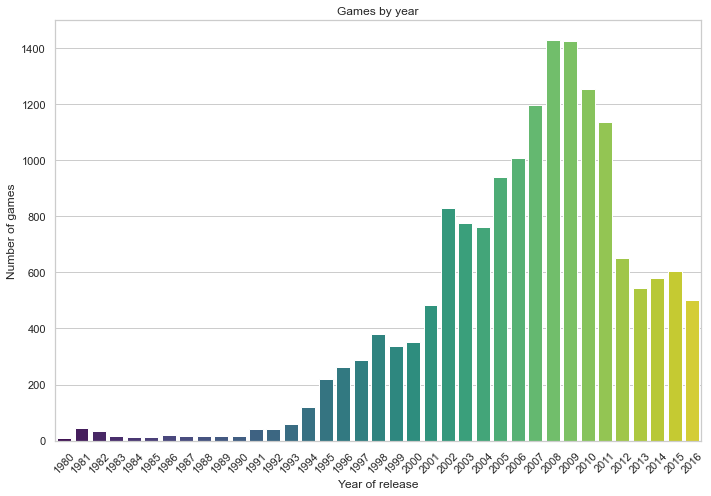

In [23]:
# release of games by year
games_by_year = df.groupby('year_of_release')['name'].count().reset_index()
sns.set(style='whitegrid')


# visualization
plt.figure(figsize=(10, 7))  
sns.barplot(x='year_of_release', y='name', data=games_by_year, palette='viridis')
plt.xlabel('Year of release')
plt.ylabel('Number of games')
plt.title('Games by year')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

According to the graph of game releases by year, we can see that the rapid growth in the number of released video games began in the mid-90s, and in 2002 the number of released games almost doubled. At first it seemed strange that since 2011 there is a decline in the number of released games, but a superficial check showed that this is indeed the case (https://en.wikipedia.org/wiki/Category:Video_games_by_year). Perhaps it is due to the rise in the cost of game production, or due to the growing popularity of mobile games. 

The period from 2012 to 2016 has been selected as relevant. 

In [24]:
# creating a dataframe filtered by the relevant period

df_actual = df.query('year_of_release >= 2012')
display(f'Data remaining after filtration: {len(df_actual) / len(df)*100:.2f}% of the original.')  

'Data remaining after filtration: 17.55% of the original.'

## Sales by platform

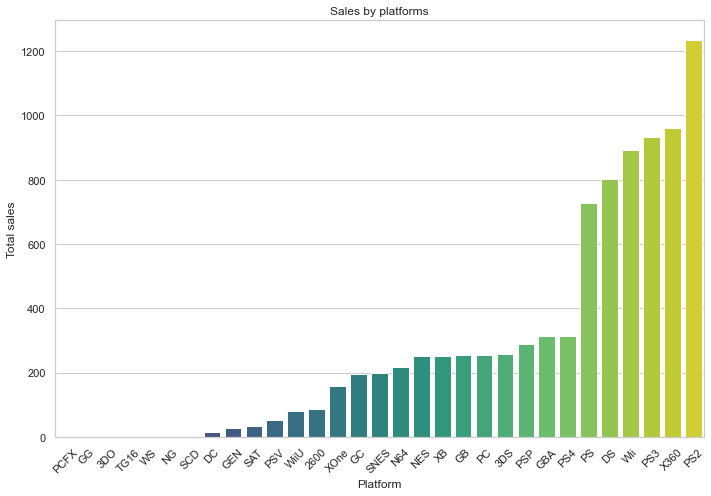

In [25]:
# grouping sales by platforms
sales_by_platforms = (df.groupby('platform')['total_sales'].sum()
                      .reset_index()
                      .sort_values(by=['total_sales']))

# visualizing
plt.figure(figsize=(10, 7))  
sns.barplot(x='platform', y='total_sales', data=sales_by_platforms, palette='viridis')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Sales by platforms')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

The top 6 platforms clearly stand out: PS, DS, Wii, PS3, X360 and PS2 (listed in ascending order of sales volume). 
Along with this, there are platforms with small sales volumes on the chart that have appeared recently relative to the timeline we look at in the dataset. For example, the PS4 and XOne were released in 2013, so by the time the dataset is published, they may not have caught up with the sales of previous versions of the platforms. Platforms starting with DC will be used for further analysis, since the other platforms have zero sales. 

## Typical platform lifetime

In [26]:
# median platform lifetime starting from 2002

platforms_from_2002 = df.query('year_of_release >= 2002')
time_life_2002 = platforms_from_2002.pivot_table(index='platform', values='year_of_release', \
                                                 aggfunc=['min', 'max']).reset_index()
time_life_2002['life'] = time_life_2002['max'] - time_life_2002['min'] + 1  
                                                            
time_life_2002['life'].median()

6.5

Since 2002, the median platform lifetime has been 6.5 years.

## Determining platforms with sales potential

Let's divide the selected platforms into 3 groups depending on sales volumes, and see which of them can be considered promising in the upcoming year.

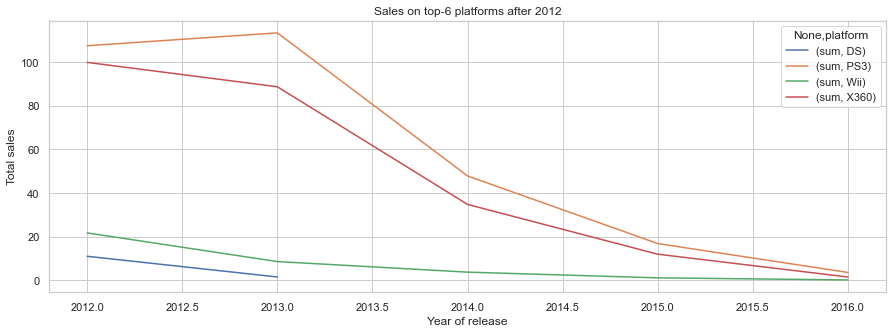

In [27]:
# distribution of sales by top 6 platforms and years

top_6_platforms = df_actual[df_actual["platform"].isin(["PS", "DS", "Wii", "PS3", "X360", "PS2"])]

top_6_lifetime = (top_6_platforms
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc={sum})
                     .plot(figsize = (15,5))
                    )
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Sales on top-6 platforms after 2012')
plt.show()

Of the top 6 platforms, PS3 and X360 still have sales by the end of the relevant period, while Wii has almost zero sales.

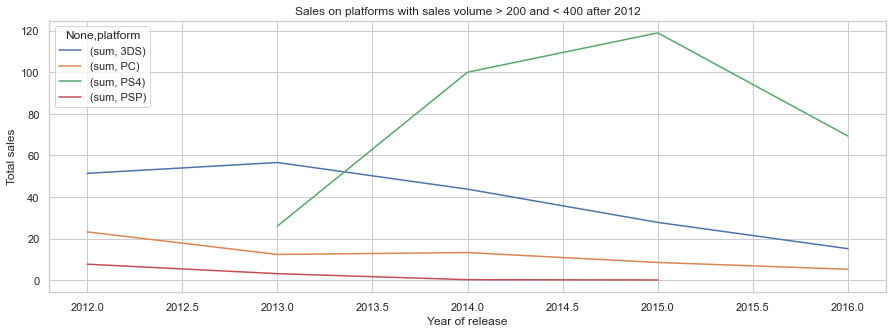

In [28]:
# distribution of sales for platforms with sales > 200 and < 400

mid_sales_platforms = df_actual[df_actual["platform"].isin(["GBA", "PS4", "PSP",  "PC", "3DS", "XB", "GB", "NES", "N64", "SNES", "GC"])]

mid_sales_platforms = (mid_sales_platforms
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc={sum})
                     .plot(figsize = (15,5))
                    )
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Sales on platforms with sales volume > 200 and < 400 after 2012')
plt.show()

There is 1 long-term player - PC. Games for it are released throughout the entire period, and despite the fact that since 2014 the sales volume has been gradually decreasing, PC should not be discounted.
Also worth noting is PlayStation4 - the platform was released in 2013, and it has the highest sales of the group.
Finally, let's mention The Nintendo 3DS. Sales have been declining since 2013, but the platform has not yet outlived its potential.

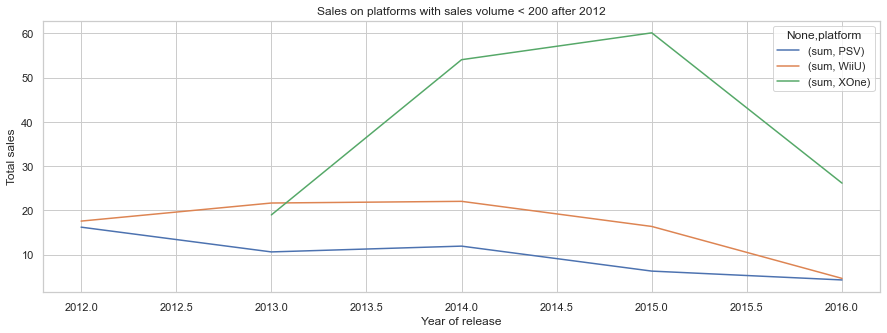

In [29]:
# distribution of sales for platforms with sales  < 200
bottom_sales_platforms = df_actual[df_actual["platform"].isin(["XOne", "2600", "WiiU", "PSV", "SAT", "GEN", "DC"])]

bottom_sales_platforms = (bottom_sales_platforms
                     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc={sum})
                     .plot(figsize = (15,5))
                    )
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Sales on platforms with sales volume < 200 after 2012')
plt.show()

Based on the last chart, let's highlight XOne as the leader, and WiiU and PSV as platforms with sales potential.

Next, let's filter the df for all selected platforms with potential to compare them among themselves.

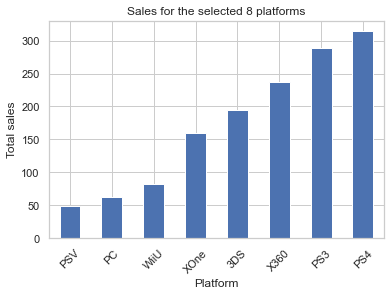

In [30]:
# total sales for the selected 8 promising platforms
platforms_with_potential = df_actual[df_actual["platform"].isin(["PS3", "X360", \
                                                                 "PS4", "PC", "3DS", "XOne", "WiiU", "PSV"])]
platforms_with_potential.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar');
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Sales for the selected 8 platforms')
plt.xticks(rotation=45)
plt.show()

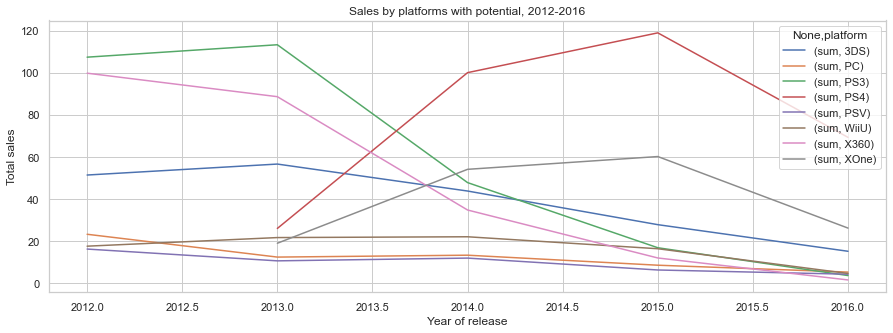

In [31]:
# sales by platforms by years
(
    platforms_with_potential
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc={sum})
 .plot(figsize = (15,5))
)
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('Sales by platforms with potential, 2012-2016')
plt.show()

Top 3 in sales for 2016: PS4, XOne and 3DS. It seems that the main platforms worth betting on in 2017 have been revealed. Let's also note the long-lived PC, the only platform that exists for the entire period under review. 

## Boxplots for global game sales

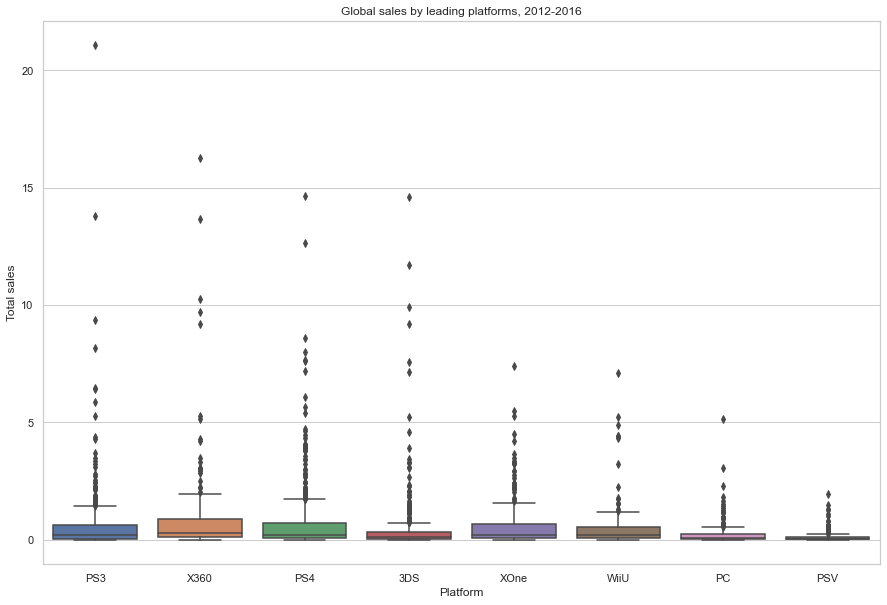

In [32]:
# boxplots for global sales by platforms
plt.figure(figsize = (15,10))
sns.boxplot(data=platforms_with_potential, y=platforms_with_potential['total_sales'], \
            x=platforms_with_potential['platform']);

plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Global sales by leading platforms, 2012-2016')
plt.show()

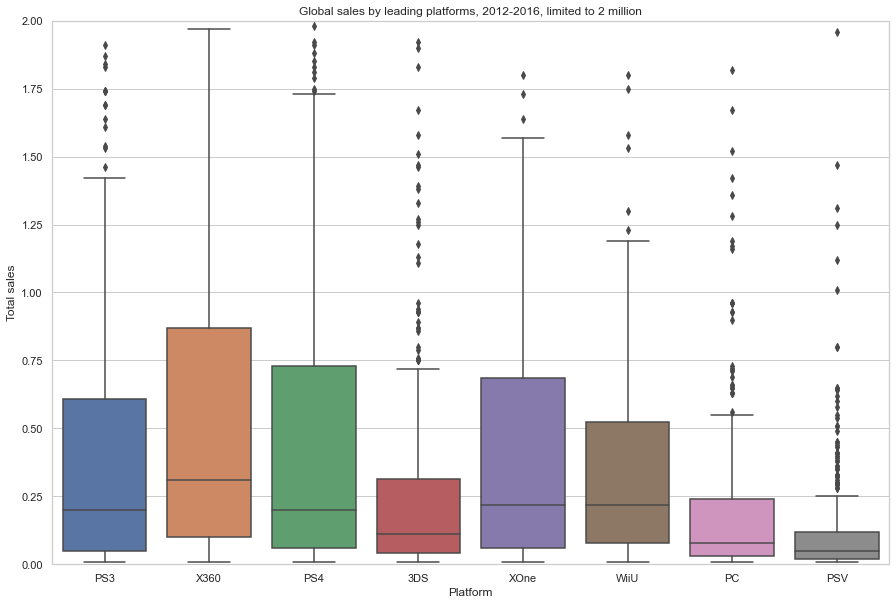

In [33]:
# boxplots for global sales by platforms limited by 2 million sales 
plt.figure(figsize = (15,10))
sns.boxplot(data=platforms_with_potential, y=platforms_with_potential['total_sales'], \
            x=platforms_with_potential['platform']);

plt.xlabel('Platform')
plt.ylabel('Total sales')

plt.title('Global sales by leading platforms, 2012-2016, limited to 2 million')
plt.ylim(0, 2)
plt.show()

The boxplots on the first chart turned out to be flattened, as almost all platforms have outliers, i.e. games that became bestsellers. The top selling game was a Wii title. The PSV had the least number of best sellers. If you look at the medians, however, they are skewed towards the bottom of the boxplots. It can be assumed that each platform has a lot of games with low sales and a small number of hit games.

##  Impact of user and critic feedback on sales

In [34]:
# platform with most sales in 2016
(
    platforms_with_potential[platforms_with_potential['year_of_release'] == 2016]
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Name: total_sales, dtype: float64

In 2016, the PS4 had the most sales. Let's choose this platform to answer the question of how sales within one popular platform are affected by user and critic reviews.

In [35]:
# dataframe with sales for PS4

PS4 = platforms_with_potential[platforms_with_potential['platform'] == 'PS4']
PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


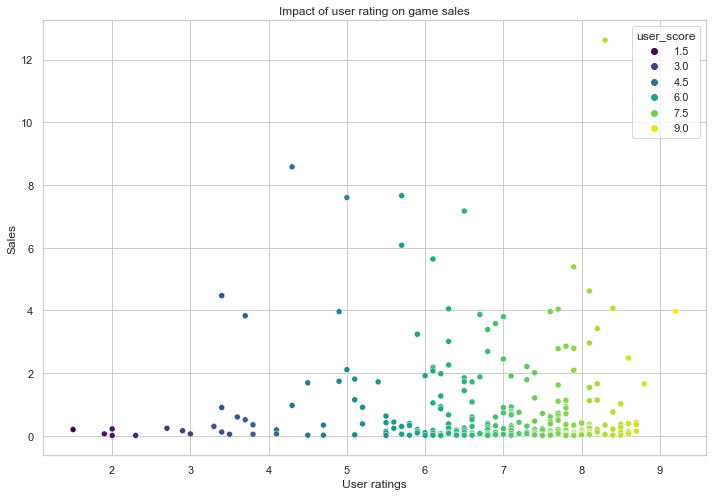

In [36]:
# Scatter plot for user ratings and sales 

plt.figure(figsize = (10, 7))
sns.scatterplot(data=PS4, x='user_score', y='total_sales', hue='user_score', palette='viridis')
plt.xlabel('User ratings')
plt.ylabel('Sales')
plt.title('Impact of user rating on game sales')
plt.tight_layout()
plt.show()

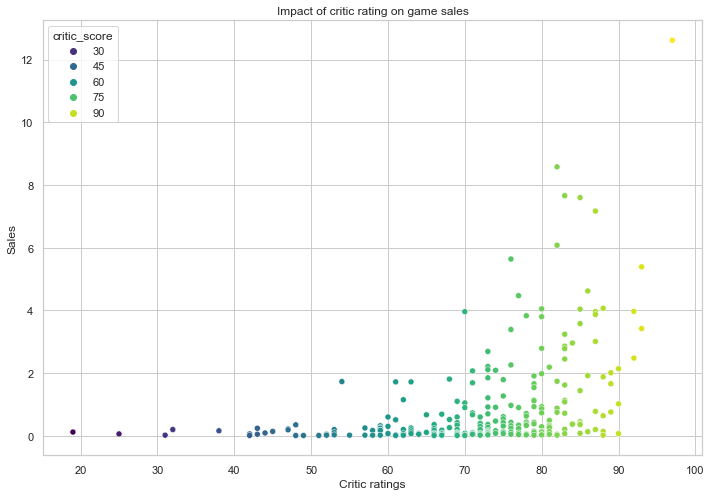

In [37]:
# Scatter plot for critic ratings and sales 

plt.figure(figsize = (10, 7))
sns.scatterplot(data=PS4, x='critic_score', y='total_sales', hue='critic_score', palette='viridis')
plt.xlabel('Critic ratings')
plt.ylabel('Sales')
plt.title('Impact of critic rating on game sales')
plt.tight_layout()
plt.show()

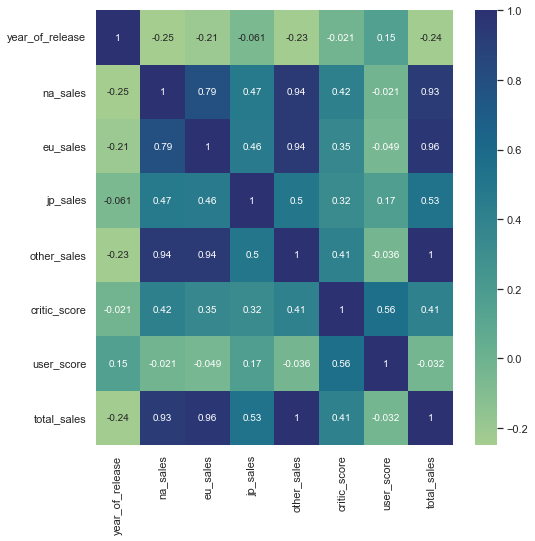

In [38]:
# Correlation between ratings and sales

corr_m = PS4.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_m, annot=True, cmap="crest")
plt.show()

It is interesting to note that user reviews and critic reviews correlate differently with sales. There is a weak positive correlation between sales and critics' scores, but with user reviews there is a weak negative correlation. Let's further check whether this observation correlates with game sales on other platforms. Next, we'll plot scatter plots and find the correlation for 6 more sales leaders in 2016: XOne, 3DS, PC, WiiU, PSV, PS3.

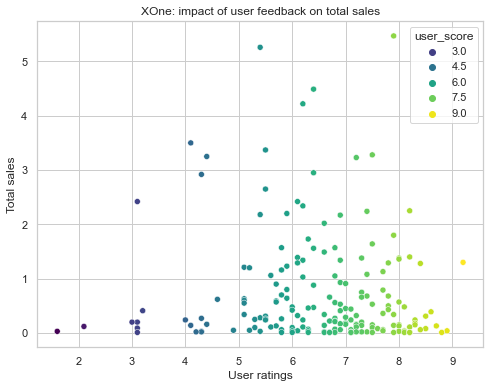

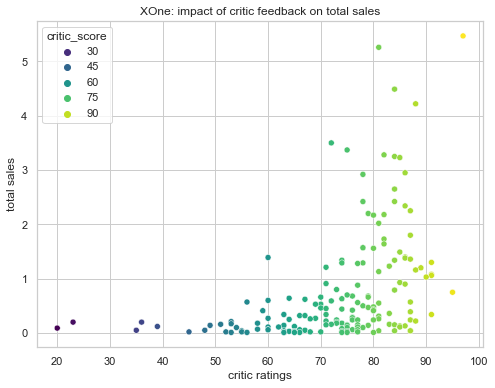

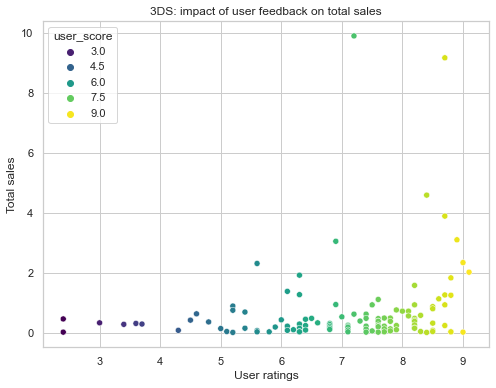

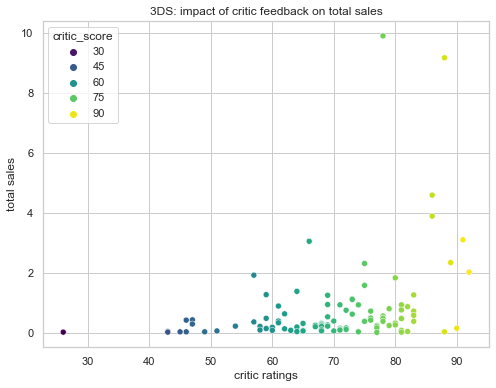

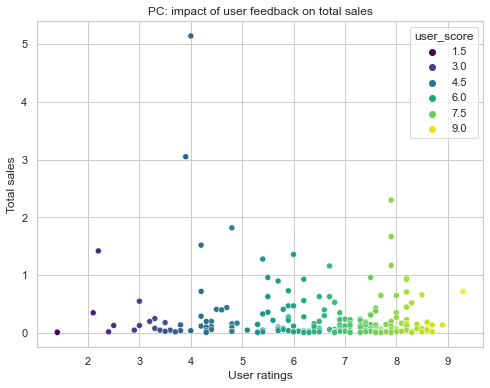

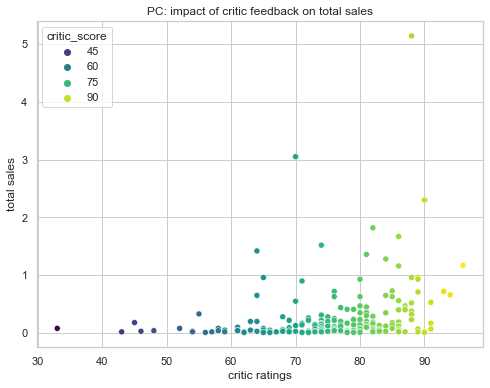

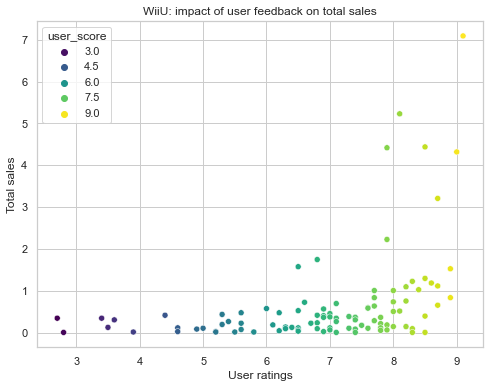

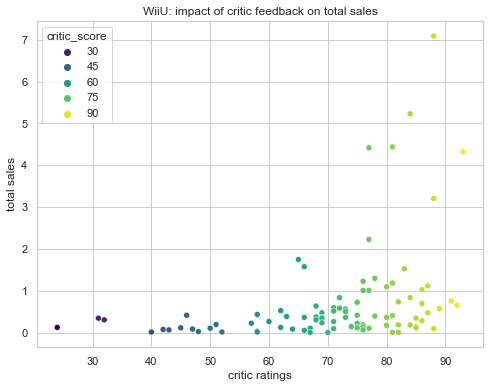

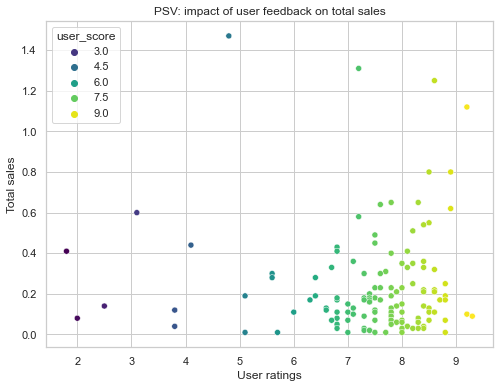

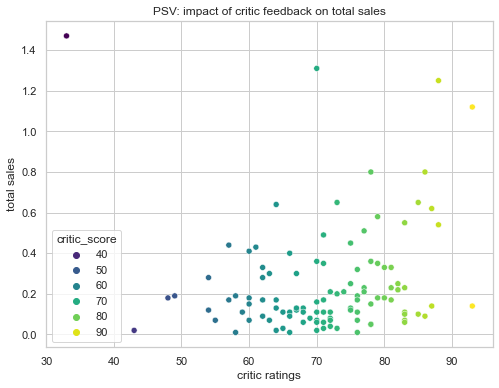

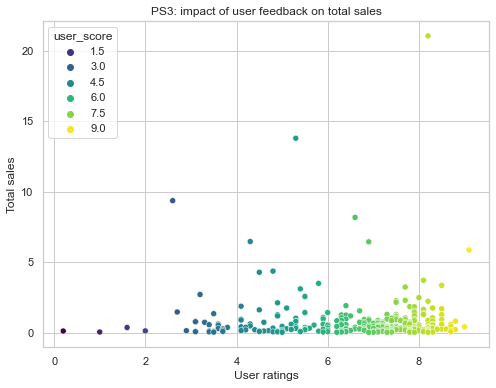

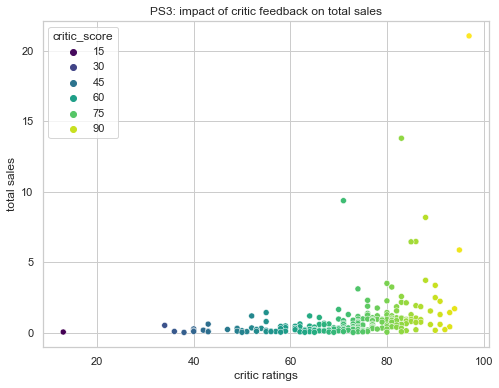

In [39]:
# a list of platforms to analyze
platforms_to_analyze = ['XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3']

# scatterplots for the selected platforms
for platform in platforms_to_analyze:
    platform_data = platforms_with_potential[platforms_with_potential['platform'] == platform]
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=platform_data, x='user_score', y='total_sales', hue='user_score', palette='viridis')
    plt.title(f'{platform}: impact of user feedback on total sales')
    plt.xlabel('User ratings')
    plt.ylabel('Total sales')
    plt.show()
            
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', hue='critic_score', palette='viridis')
    plt.title(f'{platform}: impact of critic feedback on total sales')
    plt.xlabel('critic ratings')
    plt.ylabel('total sales')
    plt.show()

In [40]:
# # correlation between ratings and sales for 6 sales leaders in 2016.
for platform in platforms_to_analyze:
    platform_data = platforms_with_potential[platforms_with_potential['platform'] == platform]

    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f'Correlation between user ratings and sales {platform}: {user_score_corr}')
    
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    print(f'Correlation between critic ratings and sales {platform}: {critic_score_corr}')

Correlation between user ratings and sales XOne: -0.06892505328279414
Correlation between critic ratings and sales XOne: 0.4169983280084017
Correlation between user ratings and sales 3DS: 0.19758263411038599
Correlation between critic ratings and sales 3DS: 0.3208028695360785
Correlation between user ratings and sales PC: -0.12186747630735577
Correlation between critic ratings and sales PC: 0.23724324311567915
Correlation between user ratings and sales WiiU: 0.4002190202148617
Correlation between critic ratings and sales WiiU: 0.34837976012017485
Correlation between user ratings and sales PSV: -0.004339437514314869
Correlation between critic ratings and sales PSV: 0.0944878992931617
Correlation between user ratings and sales PS3: -0.006205767686051499
Correlation between critic ratings and sales PS3: 0.3341517575509856


For the XOne, PC, PSV and PS3 platforms, the situation is similar to PS4: weak or very weak negative correlation between user reviews and sales, and weak or very weak positive correlation between critic reviews and sales.

In the case of the 3DS and WiiU, there is also a weak positive correlation between user reviews and sales. 

## Distribution of games by genre & most profitable genres.

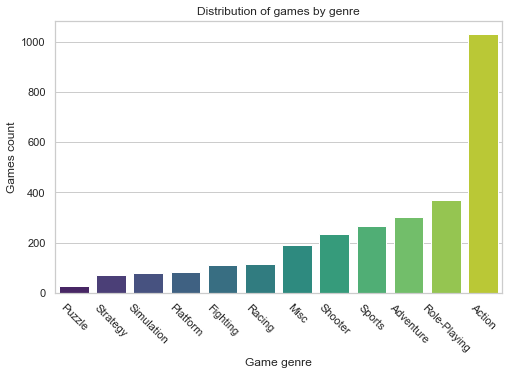

In [41]:
# distribution of games chart
game_genres = df_actual.groupby('genre').agg({'name':'count'}).reset_index().sort_values(by='name')

# visualizing
plt.figure(figsize = (8, 5))
sns.barplot(data=game_genres, x=game_genres['genre'], y=game_genres['name'], palette='viridis')
plt.xticks(rotation=-45)
plt.xlabel('Game genre')
plt.ylabel('Games count')
plt.title('Distribution of games by genre')
plt.show()

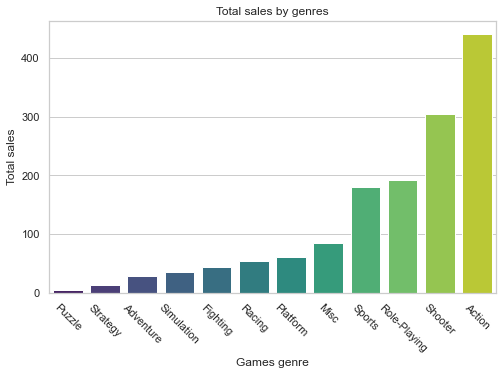

In [42]:
# distribution of sales by genre without breakdown by platform

genre = df_actual.groupby('genre').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales')
plt.figure(figsize = (8, 5))
sns.barplot(data=genre, x=genre['genre'], y=genre['total_sales'], palette='viridis')
plt.xticks(rotation=-45)
plt.xlabel('Games genre')
plt.ylabel('Total sales')
plt.title('Total sales by genres')
plt.show()

Top genres with the highest total revenue are Action, Shooter, Role-playing, Sports. Let us also consider below the median sales values by platform.

In [43]:
# median sales by platform and genre 
top_genres = (
    df_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median'])
    .fillna(0)
    .droplevel(1, axis=1)
    .sort_values(by='median', ascending=False)
)
top_genres

,sum,mean,median
genre,,,
Shooter,304.73,1.296723,0.440
Sports,181.06,0.678127,0.240
Platform,61.00,0.717647,0.210
Role-Playing,192.80,0.521081,0.140
Racing,53.50,0.465217,0.140
Fighting,44.49,0.408165,0.130
Action,441.12,0.427856,0.120
Misc,85.04,0.442917,0.120
Simulation,35.12,0.439000,0.120


If we look at the median sales by genre, we get a different picture: shooters, sports games and platformers are the leaders, while Action is not even in the top 5.

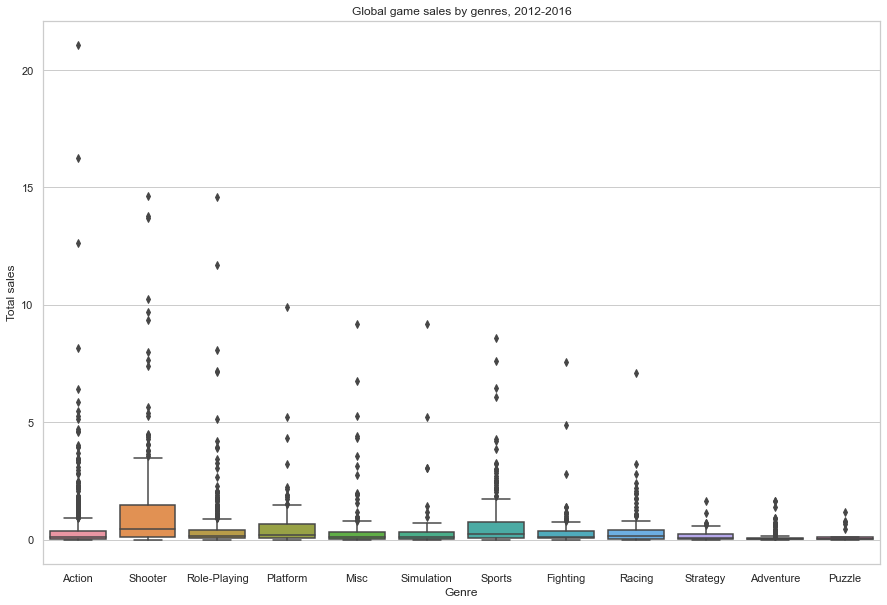

In [44]:
# boxplots for sales by genres

plt.figure(figsize = (15,10))
sns.boxplot(data=df_actual, y=df_actual['total_sales'], \
            x=df_actual['genre']);

plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('Global game sales by genres, 2012-2016')
plt.show()

In the boxplot chart, we can see that the Action genre has the biggest outlier, which explais its highest total sales. Let's build another boxplot chart below, limiting sales to 4mln.

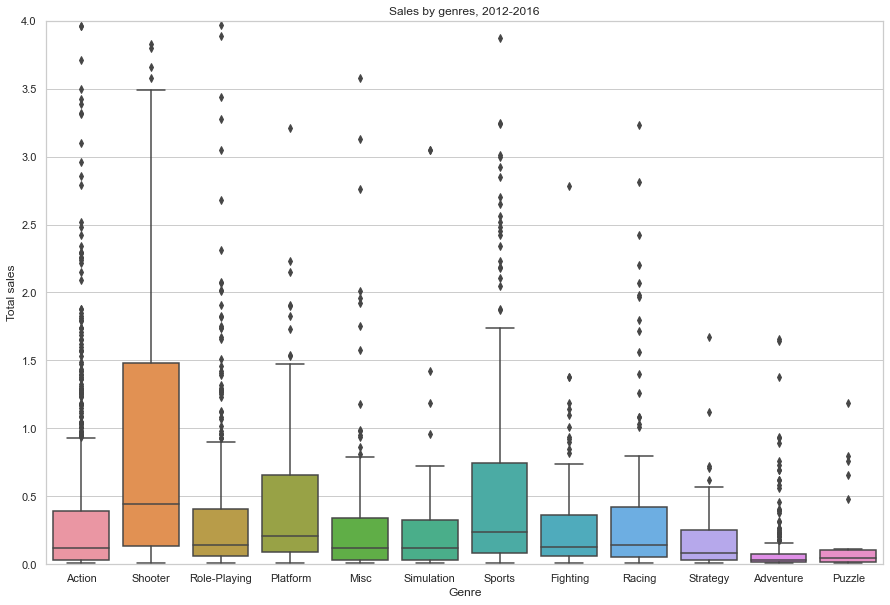

In [45]:
# boxplots for sales by genres limited by 4mln
plt.figure(figsize = (15,10))
sns.boxplot(data=df_actual, y=df_actual['total_sales'], \
            x=df_actual['genre']);

plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('Sales by genres, 2012-2016')
plt.ylim(0, 4)
plt.show()

According to this chart, we can see that the median sales are highest for Shooter, Sports, and Platform genres. 

At this stage we saw that the most games released during the period under review were in the genres of Action, Role-playing, Adventure, Sports and Shooting. The Action genre also had the highest total sales. But further analysis showed that this was due to the best-selling Action game, which sold more than 20 million copies. When looking at median sales, Shooter, Sports, Platform, Role-playing and Racing are the best performers. 

## summary

The boom period of computer games started in 2002. The relevant period for the current researcch was defined as 2012 to 2016. 

We analyzed sales by platform, selected those where sales > 0, and for them we considered sales in the relevant period. The following platforms with potential for future sales were identified: "PS3", "X360", "PS4", "PC", "3DS", "XOne", "WiiU", "PSV".

It was also determined that the characteristic platform lifetime is 7.5 years for the entire period represented in the dataset, and 6.5 years for the relevant period.

The boxplots of game sales demonstrates that each platform has a lot of games with low sales and a small number of hit games.

Correlations between reviews and sales were also analyzed, and it was found that 5 out of 7 platforms had a weak negative correlation between user reviews and sales, and a weak positive correlation between critic reviews and sales.

Finally, genre distributions were examined. We found that when looking at median sales, Shooter, Sports, Platform, Role-playing and Racing genres perform best. 

# User portraits by region

## Top 5 platforms by region

In [46]:
# function generating top-5 platforms and putting the rest in the "others"

def get_top_platforms(df, sales_column, platform_list):
    top_platforms = (
        df[['platform', sales_column]].reset_index(drop=True)
        .groupby('platform').sum(sales_column)
        .reset_index()
        .sort_values(by=sales_column, ascending=False)
    )

    top_platforms2 = top_platforms[:5].copy()

    new_row = pd.DataFrame(data={
        'platform': ['others'],
        sales_column: [top_platforms[sales_column][5:].sum()]
    })

    top_platforms2 = pd.concat([top_platforms2, new_row])

    return top_platforms2

In [47]:
# creating platform lists for each region

plaforms_na = ['X360', 'PS4', 'PS3', 'XOne', '3DS', 'WiiU', 'PC', 'Wii', 'PSV', 'DS', 'PSP']
top_platforms_na = get_top_platforms(df_actual, 'na_sales', plaforms_na)

plaforms_eu = ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'PC', 'WiiU', 'Wii', 'PSV', 'DS', 'PSP']
top_platforms_eu = get_top_platforms(df_actual, 'eu_sales', plaforms_eu)

plaforms_jp = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'PSP', 'DS', 'Wii', 'X360', 'XOne', 'PC', ]
top_platforms_jp = get_top_platforms(df_actual, 'jp_sales', plaforms_jp)

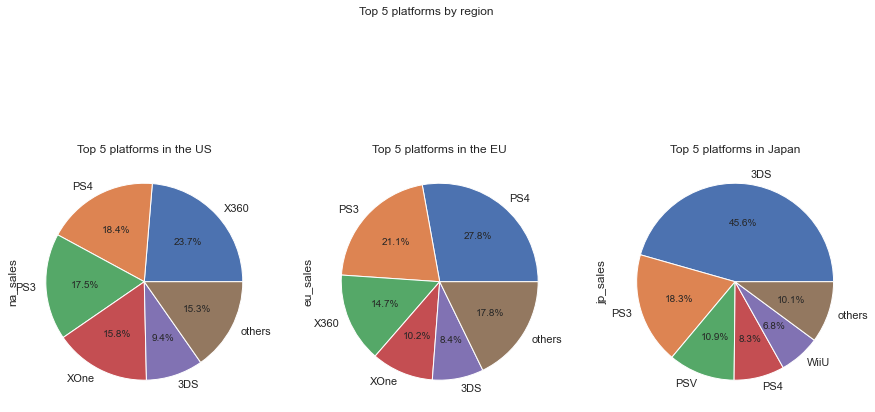

In [48]:
# Visualizing sales by platforms for each region

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8))
top_platforms_na.plot(kind = 'pie', y = 'na_sales', labels = top_platforms_na['platform'], autopct='%1.1f%%', ax = axes[0])
top_platforms_eu.plot(kind = 'pie', y = 'eu_sales', labels = top_platforms_eu['platform'], autopct='%1.1f%%', ax = axes[1])
top_platforms_jp.plot(kind = 'pie', y = 'jp_sales', labels = top_platforms_jp['platform'], autopct='%1.1f%%', ax = axes[2])
axes[0].set_title('Top 5 platforms in the US')
axes[0].legend().set_visible(False)
axes[1].set_title('Top 5 platforms in the EU')
axes[1].legend().set_visible(False)
axes[2].set_title('Top 5 platforms in Japan')
axes[2].legend().set_visible(False)
plt.suptitle('Top 5 platforms by region')
plt.show()

In Europe and the US, the same platforms are in the top 5, but the leaders are different. In Europe, PS3 and PS4 have the largest market shares, while in the US X360 is the leader. In Japan, the clear leader is the Nintendo 3DS, which has almost 46% of the market.

## Top-5 genres by region

In [49]:
# function generating top-5 genres and putting the rest in the "others"

def get_top_genres(df, sales_column, genre_list):
    top_genres = (
        df[['genre', sales_column]].reset_index(drop=True)
        .groupby('genre').sum(sales_column)
        .reset_index()
        .sort_values(by=sales_column, ascending=False)
    )

    top_genres2 = top_genres[:5].copy()

    new_row = pd.DataFrame(data={
        'genre': ['others'],
        sales_column: [top_genres[sales_column][5:].sum()]
    })

    top_genres2 = pd.concat([top_genres2, new_row])

    return top_genres2

In [50]:
# creating list of genres
genre_list = ['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc', \
              'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy', 'Adventure', 'Puzzle']

# list of genres for each region
top_genres_na = get_top_genres(df_actual, 'na_sales', genre_list)

top_genres_eu = get_top_genres(df_actual, 'eu_sales', genre_list)

top_genres_jp = get_top_genres(df_actual, 'jp_sales', genre_list)

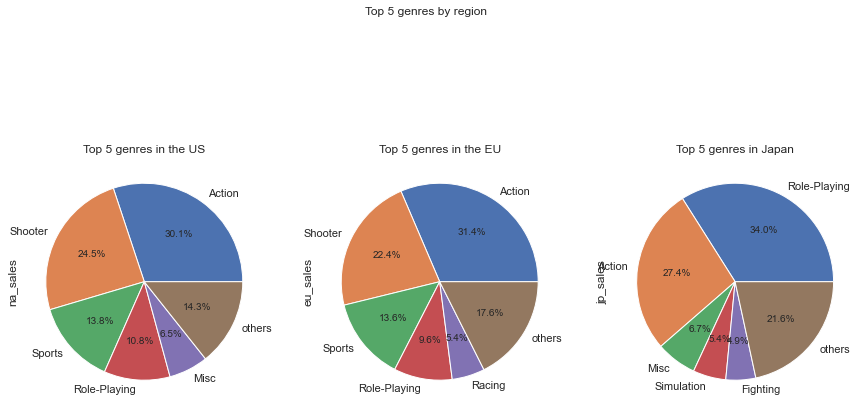

In [51]:
# visualizing

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8))
top_genres_na.plot(kind = 'pie', y = 'na_sales', labels = top_genres_na['genre'], autopct='%1.1f%%', ax = axes[0])
top_genres_eu.plot(kind = 'pie', y = 'eu_sales', labels = top_genres_eu['genre'], autopct='%1.1f%%', ax = axes[1])
top_genres_jp.plot(kind = 'pie', y = 'jp_sales', labels = top_genres_jp['genre'], autopct='%1.1f%%', ax = axes[2])
axes[0].set_title('Top 5 genres in the US')
axes[0].legend().set_visible(False)
axes[1].set_title('Top 5 genres in the EU')
axes[1].legend().set_visible(False)
axes[2].set_title('Top 5 genres in Japan')
axes[2].legend().set_visible(False)
plt.suptitle('Top 5 genres by region')
plt.show()

In the US and Europe, the top 3 genres are the same: Action, Sports, Shooter. In Japan, Role-play and Action are the leaders. 

## Impact of ESRB rating on regional sales

In [52]:
# checking unique values in 'rating'

df_actual['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

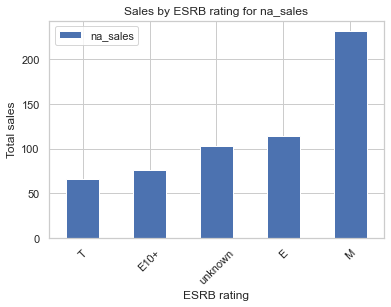

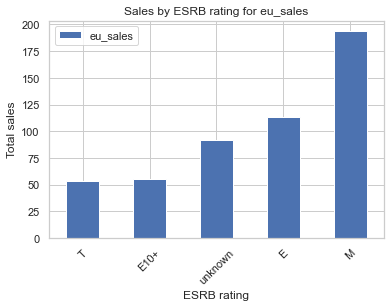

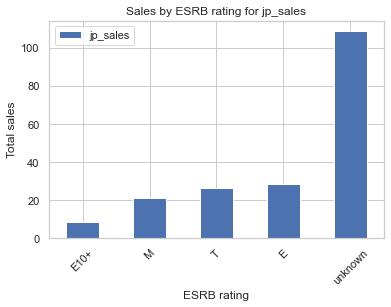

In [53]:
# sales by ESRB ratings by region

for col in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        df_actual.groupby('rating')
                .agg({col:'sum'})
                .sort_values(by=col)
                .tail(8)
                .plot(kind='bar')
    )
    plt.xlabel('ESRB rating')
    plt.ylabel('Total sales')
    plt.xticks(rotation=45)
    plt.title(f'Sales by ESRB rating for {col}')
    plt.show();

In the US and Europe, the leading rating is E (everybody, no restrictions). In Japan, "unknown" is in first place, as Japan has its own national rating system and the American ESRB is irrelevant.

## summary
In this step, we examined the most popular platforms and genres by region. Each region has its own top-selling platform, and that in Japan the most popular genre (Role-playing) is different from the top-selling Action genre in the EU and US. Finally, North American ESRB age rating is irrelevant for Japan.

# Testing hypotheses related to game ratings

Since we need to test the equality of the mean of two independent samples, the T-test will be used. Based on the selected test, we will formulate two pairs of hypotheses. 

## Average user ratings of Xbox One and PC platforms

**Hypotheses for user ratings of Xbox One and PC platforms:**
- **Н0**: The average Xbox One user rating is equal to the average PC user rating
- **Н1**: The average Xbox One user rating is not equal to the average PC user rating

Statistical significance level α = 0.05

To see if we can use a t-criterion, let's check that user ratings across platforms have a normal distribution.

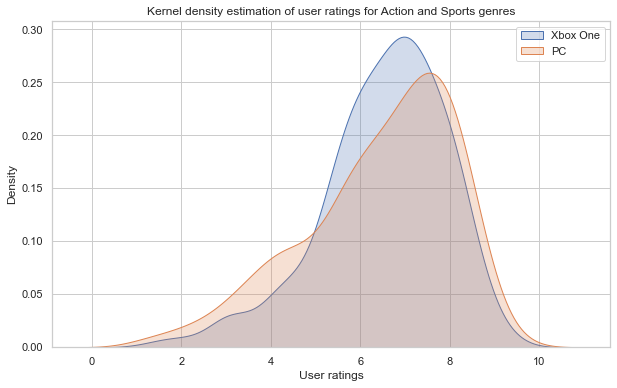

In [72]:
# Filtering rating by platforms
xbox_one_ratings = df_actual[df_actual['platform'] == 'XOne']['user_score']
pc_ratings = df_actual[df_actual['platform'] == 'PC']['user_score']

# Visualizing the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(xbox_one_ratings, label='Xbox One', shade=True)
sns.kdeplot(pc_ratings, label='PC', shade=True)
plt.xlabel('User ratings')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel density estimation of user ratings for Action and Sports genres')
plt.show()

The graphs represent a normal distribution vurve, so using the t-test is acceptable.

In [63]:
# setting the level of statistical significnce

alpha = 0.05

In [65]:
# Testing the hypothesis for average user ratings between Xbox One and PC

user_score_XOne = df_actual[(df_actual['platform'] == 'XOne') & (~df_actual['user_score'].isna())]['user_score']
user_score_PC = df_actual[(df_actual['platform'] == 'PC')& (~df_actual['user_score'].isna())]['user_score']
results = st.ttest_ind(user_score_XOne, user_score_PC)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 0.5535080500643661
Failed to reject the null hypothesis


With the available data for the relevant period, at a significance level of 5% (95% confidence level) there is no reason to reject the null hypothesis in favor of the alternative.

In [70]:
# mean and median user ratings by platform
(
    df_actual.query('platform in ["XOne", "PC"]')
    .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median'])
)

,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,206,6.428641,6.8
XOne,182,6.521429,6.8


The table with mean and median values confirms the result of the conducted test (average PC rating is 6.43, XOne - 6.52. Median ratings are equal to 6.8)

## Average user ratings of Action and Sports genres

- **Н0**: The average user rating of Action genre games is equal to the average user rating of Sports genre games
- **Н1**: The average user rating of Action genre games is not equal to the average user rating of Sports genre games

Significance level α = 0.05

To make sure that we can use the t-criterion, let's also check that the user ratings by genre have a normal distribution.

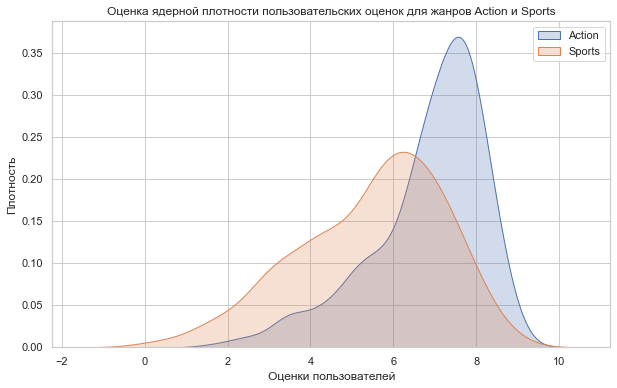

In [73]:
# Filtering ratings by platforms
action_ratings = df_actual[df_actual['genre'] == 'Action']['user_score']
sports_ratings = df_actual[df_actual['genre'] == 'Sports']['user_score']

# visualizing the distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(action_ratings, label='Action', shade=True)
sns.kdeplot(sports_ratings, label='Sports', shade=True)
plt.xlabel('Оценки пользователей')
plt.ylabel('Плотность')
plt.legend()
plt.title('Оценка ядерной плотности пользовательских оценок для жанров Action и Sports')
plt.show()

The graphs represent a normal distribution vurve, so using the t-test is acceptable.

In [68]:
# Testing the hypothesis of differences in average user ratings between Action and Sports
user_score_action = df_actual[(df_actual['genre'] == 'Action') & (~df_actual['user_score'].isna())]['user_score']
user_score_sports = df_actual[(df_actual['genre'] == 'Sports')& (~df_actual['user_score'].isna())]['user_score']

results = st.ttest_ind(user_score_action, user_score_sports)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 4.8045233804629176e-26
Reject the null hypothesis


With the available data for the relevant period, at a significance level of 5% (95% confidence level), there are reasons to reject the
the null hypothesis in favor of the alternative.

In [69]:
# mean and median user ratings by genre
(
    df_actual.query('genre in ["Action", "Sports"]')
    .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median'])
)

,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,523,6.825048,7.10
Sports,194,5.455670,5.75


The table with mean and median values confirms the result of the conducted test (mean rating of Action - 6.83, Sports - 5.46. The median ratings are 7.1 and 5.75 respectively).

## summary

Two pairs of hypotheses were formulated, where the null hypothesis stated equality of average user ratings, and the alternative hypothesis stated inequality.

T-criterion was used for this task, since we made sure that the user ratings in the samples have a similar to normal distribution, and also the samples are independent - it is unlikely that the rating of one platform or genre affects the rating of another. Finally, user ratings are continuous data for which the t-criterion is appropriate.

As a result, we conclude that for platforms there is no reason to reject the hypothesis of equal ratings. For genres, there is a reason to reject the hypothesis of equal ratings. 

# Conclusions and recommendations

First, a relevant period from 2012 to 2016 was identified, on the basis of which further work was carried out.

The leading platforms with the highest cumulative sales for the entire period were identified: PS, DS, PS3, PS3, X360 and PS2 (listed in ascending order of sales volume).

The average "life span" of the platforms is approx. 7.5 years. The platforms that are still active at the end of the period in question - and therefore are promising for the customer - were also identified: "PS3", "X360", "PS4", "PC", "3DS", "XOne", "WiiU", "PSV". 

Among them, the top 3 in sales for 2016 are: PS4, XOne, and 3DS. It is recommended to consider games for these platforms as a priority for 2017 planning. PC games should also be mentioned separately: as a gaming platform, the PC has existed for the entire period under review, and has shown a low but stable sales level.

Next, the correlation between sales and reviews was examined using the PS4 as an example. We found out that there is a weak positive correlation between sales and critics' evaluations, but with user reviews there is a weak negative correlation. Then the same was done for 6 more platforms, as a result it can be recommended to focus on critics' reviews rather than users' reviews when evaluating a game's sales potential.

The most profitable genres were studied. Although Action is the global leader in total sales, Shooter, Sports and Platform have the best median sales.

Differences specific to the three sales regions represented in the dataset were examined: NA - North America, EU - Europe, JP - Japan. The following conclusions were prepared:
- The US and Europe have the same platforms in the top 5, but the leaders differ. In Europe, the most popular console is the PS3, while in the States it is the X360. In Japan, consoles from Nintendo (DS, DS3) are very popular. 
- Japan also stands apart when analyzing genre popularity by regon. In the USA and Europe the top 3 genres are the same: Action, Sports, Shooter. In Japan, Role-play, Action, and Sports are the leaders. 
- When analyzing ESRB, Japan stands out again, probably due to the fact that ESRB is an American rating, and Japan uses its analog - [The Computer Entertainment Rating Organization](https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), CERO. 

Finally, the hypotheses of equality of user ratings for PC and Xbox One, as well as equality of user ratings for Action and Sports genres in the current period were tested. In the first case we have no reason to reject the hypothesis that the ratings are equal, in the second case we do. 

**Recommendations:**

Based on the conducted research, it is worth choosing different strategies for each region.
- In the U.S., promote games for PS4 and X360 platforms in the Action, Shooter or Sports genres and rated M or E.
- In Europe, promote games for PS3 and PS4 platforms, genres and ratings are the same as in the States.
- In Japan, focus on 3DS and PS3, genres - Role-playing and Action. It's also worth studying the Japanese CERO rating and looking at sales for it. 